# SME0823 Modelos de Regressão e Aprendizado Supervisionado II

# Modelo de regressão logística


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Modelo Linear Generalizado com Resposta Bernoulli e Ligação Logito

Seja $Y_i \sim \text{Bernoulli}(\mu_i)$ a variável resposta, com $\mu_i = \mathbb{P}(Y=1)$.

Um modelo linear generalizado (GLM) com ligação logito é definido com:

$
\text{logit}(\mu_i) = \displaystyle\log\left(\frac{\mu_i}{1-\mu_i}\right) = \eta = X_i^\top\beta,
$

onde:
- $\mu_i$ é a probabilidade de sucesso,
- $X_i$ é o vetor de covariáveis para a observação i,
- $\beta$ é o vetor de parâmetros.

### Razão de Chances (Odds Ratio)

A **chance** de sucesso é:
$
\text{odds} = \displaystyle\frac{\mu_i}{1-\mu_i}.
$

No GLM logístico, temos:
$
\text{odds} = e^{X\beta}.
$

Para uma covariável binária $x_j$, o efeito de aumentar $x_j$ em uma unidade, mantendo as demais fixas, é dado por:


$
\text{OR} = \displaystyle\frac{\text{odds}(x_j+1)}{\text{odds}(x_j)} = e^{\beta_j}.
$

Ou seja, $e^{\beta_j}$ é a **razão de chances** associada à covariável $x_j$.

**Risco Relativo (RR)**

O **risco relativo** compara probabilidades diretamente:
$
RR = \displaystyle\frac{p(x_j=1)}{p(x_j=0)}.
$

Como $\mu_i = \displaystyle\frac{e^{X_i\beta}}{1+e^{X_i\beta}}$, o risco relativo entre dois grupos é:
$
RR = \displaystyle\frac{\displaystyle\frac{e^{\eta_1}}{1+e^{\eta_1}}}{\displaystyle\frac{e^{\eta_0}}{1+e^{\eta_0}}},
$
onde $\eta_1$ e $\eta_0$ são os preditores lineares para os dois grupos comparados.

**Resumo**
- A função de ligação logito transforma probabilidades em log-odds.
- O coeficiente $\beta_j$ tem interpretação natural em termos de razão de chances: $e^{\beta_j}$.
- O risco relativo pode ser obtido, mas exige voltar das chances para probabilidades.

A diabetes é uma doença causada pela produção insuficiente ou má absorção de insulina, hormônio que regula a glicose no sangue e garante energia para o organismo.

Em um estudo, 150 pacientes com diabetes ou pré-diabetes receberam acompanhamento por 2 anos e em seguida foram coletadas informações básicas: idade, sexo, índice de massa corporal, pressão arterial média e uma medida de soro sanguíneo, além da medida de hemoglobina glicada e a classificação se o indivíduo tem ou não diabetes após o acompanhamento.

A listagem das variáveis disponíveis é dada a seguir

- 'Idade', em anos completos;
- 'Sexo' (1 se feminino, 0 se masculino);
- 'IMC': Índice de massa corporal;
- 'PAM': Pressão arterial média;
- 'S': uma medida de soro sanguíneo;
- 'Y': hemoglobina glicada;
- 'diabetes': 1, se o paciente desenvolveu diabetes e 0, caso contrário;

Atenção: 'Y' e 'diabetes' são ambas variáveis-resposta, uma contínua e uma categórica, e não devem ser usadas como variáveis preditoras.

Os dados estão disponíveis em https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv


1. Investigue a associação de cada uma das variáveis com a resposta 'Y' com uma **análise exploratória de dados** via matriz de gráficos de dispersão e matriz de correlações, para verificar a associação entre as variáveis. Comente os resultados obtidos.



2. Ajuste um **modelo de regressão linear** com intercepto, com resposta 'Y' e todas as variáveis preditoras: 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Considerando o valor-p (P>|t|), indique as duas preditoras com maior significância estatística marginal neste modelo e interprete seus coeficientes.



3. Faça uma **análise descritiva dos dados**. Qual o percentual de pacientes de cada sexo que desenvolveu e não desenvolveu diabetes? Investigue a associação de cada uma das preditoras contínuas com a resposta 'diabetes' via **análise exploratória de dados** para verificar a associação entre as variáveis. Comente os resultados obtidos.



4. Ajuste um **modelo de regressão logística** com intercepto para a resposta 'diabetes' com preditoras 'Idade', 'Sexo', 'IMC', 'PAM' e 'S'. Esse modelo é um MLG com resposta binomial e ligação logito. Avalie como as preditoras 'Idade' e 'IMC' influenciam na resposta 'diabetes' (sugestão: razão de chances, dada neste modelo por $OR = \exp(b_j)$, em que $b_j$ é o coeficiente estimado correspondente à j-ésima preditora e Risco Relativo RR).


5. Desenvolva uma análise de pontos de alavanca e, caso haja alguma observação em destaque, identifique-a e investigue se ela contém algum comportamento inesperado.  

6. Ajuste modelos com ligação probito e complemento log-log. Compare com o modelo logito.


A entrega deve ser feita com um notebook executado no formato .ipynb, com os códigos usados para a obtenção dos resultados. O notebook deve ser comentado de forma a facilmente identificar os códigos de cada análise. Alguns códigos de apoio são fornecidos abaixo, para a leitura dos dados e para iniciar as suas análises. Procure utilizar bibliotecas Python abordadas na disciplina.

Para esta aplicação, considere que não é necessário fazer mais nenhuma seleção de atributos ou dividir a base em treinamento e teste.



In [ ]:
!pip install statsmodels

## Carregamento de pacotes e leitura de dados

In [ ]:
# Carrega os pacotes
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
caminho = 'https://raw.githubusercontent.com/cibelerusso/Datasets/main/diabetes.csv'
df = pd.read_csv(caminho, sep=';', index_col='ID')
df.head(3)

,Idade,Sexo,IMC,PAM,S,Y,diabetes
ID,,,,,,,
112126,32,0,27.2878,84.9978,6.0216,6.1589,0
897505,43,1,29.5730,82.5959,5.1257,6.9437,1
650952,47,1,24.3119,88.0686,3.4778,7.2397,1


# 1.  Análise exploratória de dados



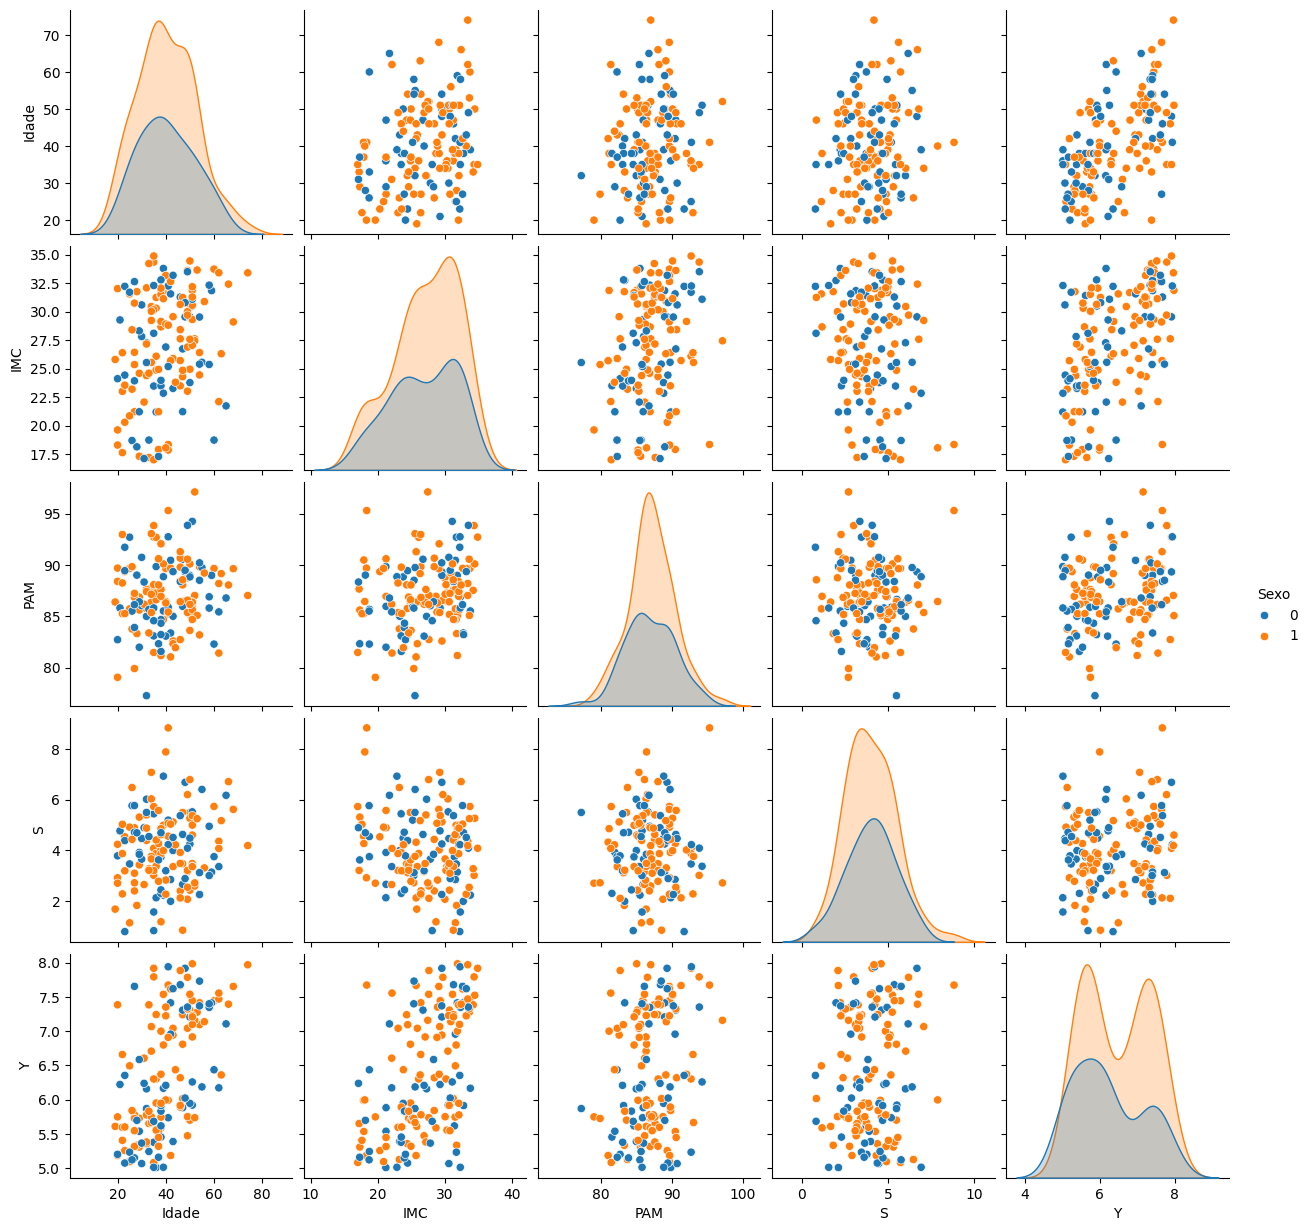

In [ ]:
# Sugestão: separar por sexo
sns.pairplot(df.drop('diabetes',axis=1), hue='Sexo');

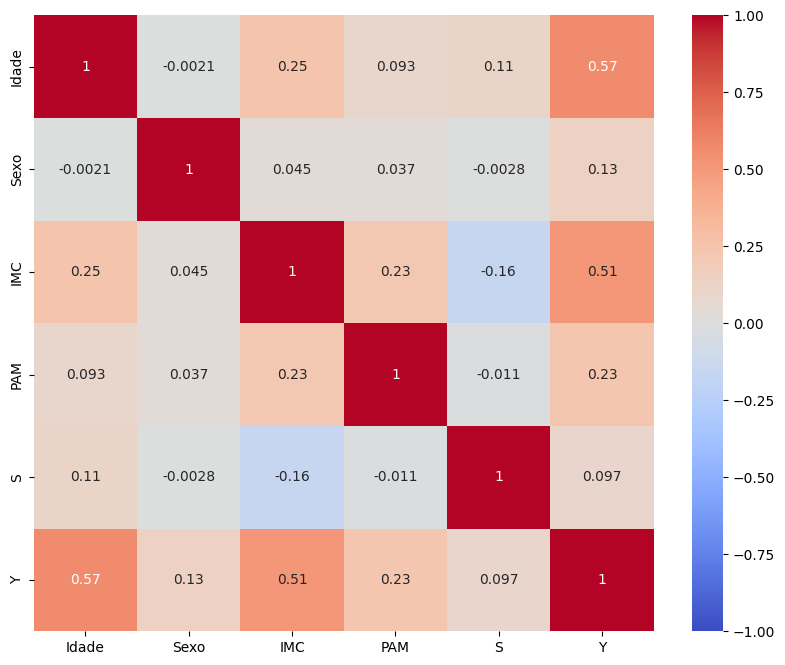

In [ ]:
# Matriz de correlações
correlation_matrix = df.drop('diabetes',axis=1).corr();

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## 2. Modelo de regressão linear
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)


In [ ]:
# Modelo de regressão linear
from statsmodels.formula.api import ols

mod = ols('Y ~  Idade + Sexo +  IMC + PAM + S', data=df)
res = mod.fit()
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     29.26
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           2.05e-20
Time:                        23:31:10   Log-Likelihood:                -144.22
No. Observations:                 150   AIC:                             300.4
Df Residuals:                     144   BIC:                             318.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1713      1.401      0.122      0.9

## 3. Análise descritiva e exploratória
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

**Análise descritiva**

In [ ]:
df.describe()

,Idade,Sexo,IMC,PAM,S,Y,diabetes
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,40.300000,0.640000,27.118157,87.078697,4.017304,6.383655,0.420000
std,11.697387,0.481608,4.807848,3.314999,1.444145,0.901606,0.495212
min,19.000000,0.000000,17.030100,77.266400,0.800400,5.010800,0.000000
25%,32.000000,0.000000,23.855675,85.261550,3.108550,5.613175,0.000000
50%,39.000000,1.000000,27.612400,86.862750,3.958850,6.216600,0.000000
75%,49.000000,1.000000,31.289575,89.359175,4.986000,7.268900,1.000000
max,74.000000,1.000000,34.893300,97.128700,8.836000,7.983600,1.000000


In [ ]:
# Análise descritiva separada por diabetes 0 ou 1

df.groupby(by='diabetes').describe().T

diabetes             0          1
Idade count  87.000000  63.000000
      mean   35.597701  46.793651
      std    10.026082  10.748081
      min    19.000000  20.000000
      25%    27.500000  40.500000
      50%    35.000000  48.000000
      75%    40.500000  52.500000
      max    63.000000  74.000000
Sexo  count  87.000000  63.000000
      mean    0.574713   0.730159
      std     0.497253   0.447443
      min     0.000000   0.000000
      25%     0.000000   0.000000
      50%     1.000000   1.000000
      75%     1.000000   1.000000
      max     1.000000   1.000000
IMC   count  87.000000  63.000000
      mean   25.306348  29.620178
      std     4.713994   3.709509
      min    17.030100  18.368200
      25%    21.666150  27.264600
      50%    25.205400  30.577700
      75%    29.651500  32.383450
      max    33.803700  34.893300
PAM   count  87.000000  63.000000
      mean   86.568544  87.783194
      std     3.249345   3.300719
      min    77.266400  81.180800
      25%    84.840950  85.720350
      50%    86.616600  87.537000
      75%    88.855650  89.674250
      max    94.258500  97.128700
S     count  87.000000  63.000000
      mean    3.860755   4.233490
      std     1.414469   1.467987
      min     0.800400   1.995400
      25%     3.013350   3.125400
      50%     3.869400   4.193900
      75%     4.746900   5.190000
      max     7.887200   8.836000
Y     count  87.000000  63.000000
      mean    5.690753   7.340521
      std     0.405762   0.348026
      min     5.010800   6.586500
      25%     5.362400   7.102650
      50%     5.702400   7.352300
      75%     5.949800   7.586350
      max     6.494800   7.983600

**Análise exploratória de dados**

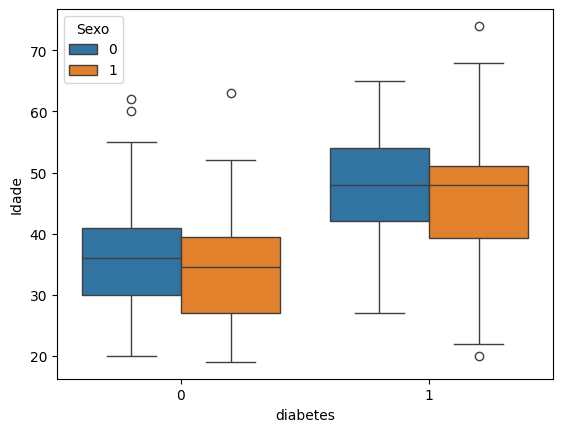

In [ ]:
# sugestão: separar por sexo
import seaborn as sns
sns.boxplot(data=df, x='diabetes', y='Idade', hue='Sexo');

## 4. Modelo de regressão logística
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

In [ ]:
# Preditoras
preditoras = df[['Idade','Sexo', 'IMC', 'PAM', 'S']]
preditoras_com_intercepto = sm.add_constant(preditoras)

# Resposta
resposta = df['diabetes']

# Modelo de regressão logística com intercepto
glm_binom = sm.GLM(resposta, preditoras_com_intercepto, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  150
Model:                            GLM   Df Residuals:                      144
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.379
Date:                Wed, 15 Oct 2025   Deviance:                       130.76
Time:                        23:31:10   Pearson chi2:                     144.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3867
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.2384      6.166     -3.120      0.0

**Interpretação dos coeficientes do modelo**

In [ ]:
import numpy as np

# Coeficientes do modelo
params = res.params

# Odds ratio
odds_ratios = np.exp(params)

# Intervalos de confiança
conf = res.conf_int()
conf['OR'] = odds_ratios
conf.columns = ['2.5%', '97.5%', 'OR']
conf = np.exp(conf)

print(conf)


               2.5%     97.5%         OR
const  2.489603e-14  0.000783   1.000000
Idade  1.064147e+00  1.168199   3.049447
Sexo   1.128641e+00  7.116961  17.016190
IMC    1.159147e+00  1.465637   3.681847
PAM    9.292554e-01  1.206655   2.883227
S      1.046613e+00  1.924231   4.133515


In [ ]:
# probabilidade média no grupo de referência (ex: sexo = 0)
grupo_ref = preditoras_com_intercepto.copy()
grupo_ref['Sexo'] = 0
p0 = res.predict(grupo_ref).mean()

# OR para Sexo
or_sexo = odds_ratios['Sexo']

# RR aproximado
rr_sexo = or_sexo / ((1 - p0) + (p0 * or_sexo))
print("RR Sexo:", rr_sexo)


RR Sexo: 1.7782672203247498


In [ ]:
# OR e RR para Idade

grupo_ref = preditoras_com_intercepto.copy()
grupo_ref['Idade'] = 0
p0 = res.predict(grupo_ref).mean()

# OR para Sexo
or_idade = odds_ratios['Idade']

# RR aproximado
rr_idade = or_idade  / ((1 - p0) + (p0 * or_idade ))
print("RR Sexo:", rr_idade)


RR Sexo: 1.1129581177384353


# 5. Análise de pontos de alavanca
(Alguns códigos são sugeridos. Inclua outros, se necessário, e responda às perguntas)

**Análise de pontos de alavanca**

In [ ]:
import plotly.graph_objects as go

# Supondo que 'res.get_influence().hat_matrix_diag' seja um array ou Series
hat_values = res.get_influence().hat_matrix_diag

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=hat_values,
    mode='markers',
    marker=dict(color='blue'),
    name='Hat Values'
))

fig.update_layout(
    title='Pontos de Alavanca (Hat Values)',
    xaxis_title='Índice',
    yaxis_title='Hat Value',
    plot_bgcolor='white'
)

fig.show()


In [ ]:
df.iloc[18,]

,622034
Idade,41.0000
Sexo,1.0000
IMC,18.3682
PAM,95.3120
S,8.8360
Y,7.6730
diabetes,1.0000


In [ ]:
# Resíduos componente do desvio
residuos_desvio = res.resid_deviance

# Plotando com Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=residuos_desvio,
    mode='markers',
    marker=dict(color='red'),
    name='Resíduos do Desvio'
))

fig.update_layout(
    title='Resíduos Componente do Desvio',
    xaxis_title='Índice',
    yaxis_title='Resíduo do Desvio',
    plot_bgcolor='white'
)

fig.show()


In [ ]:
import statsmodels.api as sm

# Preditoras
preditoras = df[['Idade','Sexo', 'IMC', 'PAM', 'S']]
X = sm.add_constant(preditoras)

# Resposta
y = df['diabetes']

# -------------------------------
# Modelo binomial com link próbit
# -------------------------------
probit_glm = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.probit()))
res_probit = probit_glm.fit()

print(res_probit.summary())

# Coeficientes e IC
coef = res_probit.params
ic   = res_probit.conf_int()
ic.columns = ['IC 2.5%', 'IC 97.5%']



                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  150
Model:                            GLM   Df Residuals:                      144
Model Family:                Binomial   Df Model:                            5
Link Function:                 probit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.443
Date:                Wed, 15 Oct 2025   Deviance:                       130.89
Time:                        23:31:12   Pearson chi2:                     142.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3862
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3714      3.508     -3.241      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning:

The probit link alias is deprecated. Use Probit instead. The probit link alias will be removed after the 0.15.0 release.



In [ ]:

# Resíduos componente do desvio (disponíveis no GLM)
residuos_desvio = res_probit.resid_deviance

# Probabilidades previstas
p_hat = res_probit.predict(X)


# Plotando com Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=residuos_desvio,
    mode='markers',
    marker=dict(color='red'),
    name='Resíduos do Desvio'
))

fig.update_layout(
    title='Resíduos Componente do Desvio - Modelo probito',
    xaxis_title='Índice',
    yaxis_title='Resíduo do Desvio',
    plot_bgcolor='white'
)

fig.show()


### Modelo complemento log log

In [ ]:
import statsmodels.api as sm

# Preditoras
preditoras = df[['Idade','Sexo', 'IMC', 'PAM', 'S']]
X = sm.add_constant(preditoras)

# Resposta
y = df['diabetes']

# -------------------------------
# Modelo binomial com link complementary log-log
# -------------------------------
cll_glm = sm.GLM(y, X, family=sm.families.Binomial(link=sm.families.links.cloglog()))
res_cll = cll_glm.fit()

print(res_cll.summary())

# Coeficientes e IC (escala do índice do cloglog)
coef_cll = res_cll.params
ic_cll = res_cll.conf_int()
ic_cll.columns = ['IC 2.5%', 'IC 97.5%']

# Resíduos componente do desvio
residuos_desvio_cll = res_cll.resid_deviance

# Probabilidades previstas
p_hat_cll = res_cll.predict(X)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               diabetes   No. Observations:                  150
Model:                            GLM   Df Residuals:                      144
Model Family:                Binomial   Df Model:                            5
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -65.914
Date:                Wed, 15 Oct 2025   Deviance:                       131.83
Time:                        23:31:12   Pearson chi2:                     137.
No. Iterations:                     9   Pseudo R-squ. (CS):             0.3823
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1438      4.201     -3.128      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning:

The cloglog link alias is deprecated. Use CLogLog instead. The cloglog link alias will be removed after the 0.15.0 release.



In [ ]:
p_hat_cll

,0
ID,
112126,0.204419
897505,0.690683
650952,0.340216
555951,0.763288
321314,0.556632
...,...
794433,0.638565
457562,0.178999
450665,0.284481


In [ ]:

# Plotando com Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=residuos_desvio,
    mode='markers',
    marker=dict(color='red'),
    name='Resíduos do Desvio'
))

fig.update_layout(
    title='Resíduos Componente do Desvio: Modelo complemento log-log',
    xaxis_title='Índice',
    yaxis_title='Resíduo do Desvio',
    plot_bgcolor='white'
)

fig.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Preditoras e resposta
preditoras = df[['Idade', 'Sexo', 'IMC', 'PAM', 'S']]
X = sm.add_constant(preditoras)
y = df['diabetes']

# Previsões dos dois modelos
p_logit = res.predict(X)
p_cloglog = res_cll.predict(X)

# DataFrame com resultados
pred_df = pd.DataFrame({
    'Idade': df['Idade'],
    'IMC': df['IMC'],
    'Sexo': df['Sexo'],
    'PAM': df['PAM'],
    'S': df['S'],
    'diabetes_obs': y,
    'Logit': p_logit,
    'Cloglog': p_cloglog
})


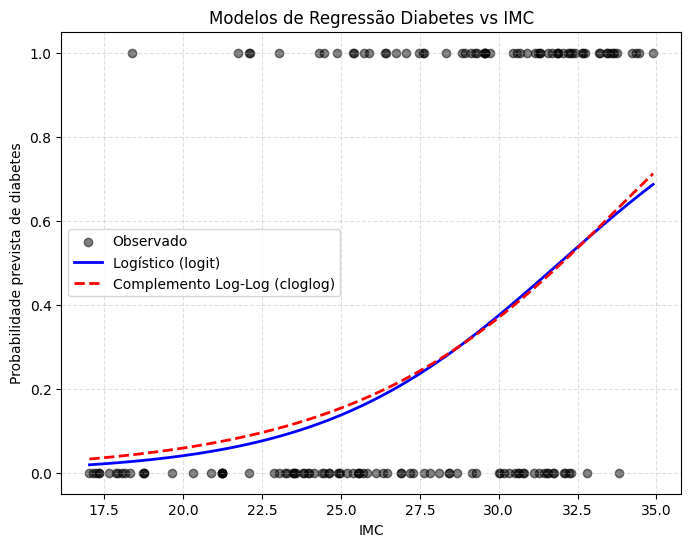

In [26]:
# Sequência de IMC
imc_seq = np.linspace(df['IMC'].min(), df['IMC'].max(), 100)

# Cria matriz de preditores com IMC variando e outras fixas na média
X_pred = pd.DataFrame({
    'const': 1,
    'Idade': df['Idade'].mean(),
    'Sexo': 0,  # masculino como referência
    'IMC': imc_seq,
    'PAM': df['PAM'].mean(),
    'S': df['S'].mean()
})

# Probabilidades previstas
p_logit_pred = res.predict(X_pred)
p_cloglog_pred = res_cll.predict(X_pred)

# Gráfico
plt.figure(figsize=(8,6))
plt.scatter(df['IMC'], df['diabetes'], color='black', alpha=0.5, label='Observado')
plt.plot(imc_seq, p_logit_pred, color='blue', label='Logístico (logit)', linewidth=2)
plt.plot(imc_seq, p_cloglog_pred, color='red', linestyle='--', label='Complemento Log-Log (cloglog)', linewidth=2)

plt.title('Modelos de Regressão Diabetes vs IMC')
plt.xlabel('IMC')
plt.ylabel('Probabilidade prevista de diabetes')
plt.legend()
plt.grid(alpha=0.4, linestyle='--')
plt.show()
